**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**
---
# Ejercicio 4: Función de Producción y Derivadas Parciales

**Objetivo:** Calcular derivadas parciales y evaluar funciones de producción

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp

## Enunciado

Una función de producción está dada por **q = x^(1/2) * y^(1/2)** donde **x** e **y** son las cantidades de los insumos (Capital y trabajo) cuya función de costo total está dada por **x + 2y + 100 = C**.

**Se solicita:**

**a.** Hallar la primera derivada de la función de cantidades y costos respecto de x e y.

**b.** Evalúe la primera derivada de la cantidad en (2,2).

**c.** Explique en un párrafo cuál es la función objetivo y la restricción, a su vez qué herramienta es la correcta para optimizar este punto y describa a qué refiere el punto óptimo.

**d.** Suponga que ahora la función de producción se rige únicamente por costos de un insumo tomando así la siguiente forma: **x + 2x² + 100 = C**.
   - **i.** ¿Cuál es el insumo clave en los costos ahora? ¿Puede distinguir una parte fija de una variable? Explique.
   - **ii.** Optimice la función y justifique su resultado.

## Parte a: Derivadas parciales

In [12]:
# Definir variables simbólicas
x, y = sp.symbols('x y')

# Función de producción: q = x^(1/2) * y^(1/2)
q = x**(sp.Rational(1,2)) * y**(sp.Rational(1,2))
print("Función de producción:")
print(f"q = {q}")
print(f"q = √x · √y")

Función de producción:
q = sqrt(x)*sqrt(y)
q = √x · √y


In [13]:
# Derivadas parciales de la función de producción
dq_dx = sp.diff(q, x)
dq_dy = sp.diff(q, y)

print("Derivadas parciales de q:")
print(f"∂q/∂x = {dq_dx}")
print(f"∂q/∂y = {dq_dy}")

Derivadas parciales de q:
∂q/∂x = sqrt(y)/(2*sqrt(x))
∂q/∂y = sqrt(x)/(2*sqrt(y))


In [14]:
# Función de costo: C = x + 2y + 100
C = x + 2*y + 100
print("Función de costo:")
print(f"C = {C}")

# Derivadas parciales de la función de costo
dC_dx = sp.diff(C, x)
dC_dy = sp.diff(C, y)

print("\nDerivadas parciales de C:")
print(f"∂C/∂x = {dC_dx}")
print(f"∂C/∂y = {dC_dy}")

Función de costo:
C = x + 2*y + 100

Derivadas parciales de C:
∂C/∂x = 1
∂C/∂y = 2


## Parte b: Evaluación en el punto (2,2)

In [15]:
# Evaluar las derivadas en el punto (2,2)
punto_x = 2
punto_y = 2

# Evaluar derivadas de q en (2,2)
dq_dx_en_punto = dq_dx.subs([(x, punto_x), (y, punto_y)])
dq_dy_en_punto = dq_dy.subs([(x, punto_x), (y, punto_y)])

print(f"Evaluación de derivadas de q en ({punto_x},{punto_y}):")
print(f"∂q/∂x|({punto_x},{punto_y}) = {dq_dx_en_punto}")
print(f"∂q/∂y|({punto_x},{punto_y}) = {dq_dy_en_punto}")

# También evaluemos la producción en ese punto
q_en_punto = q.subs([(x, punto_x), (y, punto_y)])
print(f"\nProducción en ({punto_x},{punto_y}): q = {q_en_punto}")

Evaluación de derivadas de q en (2,2):
∂q/∂x|(2,2) = 1/2
∂q/∂y|(2,2) = 1/2

Producción en (2,2): q = 2


## Parte c: Análisis de optimización

### Explicación del problema de optimización:

En este problema tenemos:

**Función objetivo:** Maximizar la producción q = √(x·y), donde queremos obtener la mayor cantidad de producto posible.

**Restricción:** El costo total C = x + 2y + 100 debe mantenerse dentro de un presupuesto determinado.

**Herramienta correcta:** Para resolver este problema de optimización con restricciones, la herramienta más apropiada es encontrar los puntos donde las derivadas parciales nos ayuden a identificar la mejor combinación de insumos. En términos económicos, buscamos el punto donde la productividad marginal por peso gastado sea igual para ambos insumos.

**Punto óptimo:** El punto óptimo representa la combinación de capital (x) y trabajo (y) que maximiza la producción para un nivel de costo dado, o equivalentemente, minimiza el costo para un nivel de producción deseado. En este punto, la empresa no puede mejorar su situación redistribuyendo los recursos entre los dos insumos.

## Parte d: Nueva función de costo

### d.i: Análisis de la nueva función de costo

In [16]:
# Nueva función de costo: C = x + 2x² + 100
C_nueva = x + 2*x**2 + 100

print("Nueva función de costo:")
print(f"C = {C_nueva}")

print("\n¿Cuál es el insumo clave?")
print("El insumo clave ahora es el CAPITAL (x), ya que la función de costo solo depende de x.")
print("El trabajo (y) ya no aparece en la función de costo.")

print("\n¿Puede distinguir parte fija y variable?")
print("SÍ, se pueden distinguir claramente:")
print("• Costo FIJO: 100 (no depende del nivel de capital)")
print("• Costo VARIABLE: x + 2x² (depende del nivel de capital utilizado)")
print("  - x: componente lineal del costo variable")
print("  - 2x²: componente cuadrático que crece más rápido")

Nueva función de costo:
C = 2*x**2 + x + 100

¿Cuál es el insumo clave?
El insumo clave ahora es el CAPITAL (x), ya que la función de costo solo depende de x.
El trabajo (y) ya no aparece en la función de costo.

¿Puede distinguir parte fija y variable?
SÍ, se pueden distinguir claramente:
• Costo FIJO: 100 (no depende del nivel de capital)
• Costo VARIABLE: x + 2x² (depende del nivel de capital utilizado)
  - x: componente lineal del costo variable
  - 2x²: componente cuadrático que crece más rápido


### d.ii: Optimización de la nueva función

In [17]:
# Para optimizar, necesitamos una función objetivo
# Como solo tenemos capital (x), asumamos que trabajo es fijo (y=1)
y_fijo = 1
q_simplificada = x**(sp.Rational(1,2)) * y_fijo**(sp.Rational(1,2))

print(f"Con trabajo fijo (y = {y_fijo}):")
print(f"q = √x")
print(f"C = x + 2x² + 100")

# Función de eficiencia: q/C
eficiencia = q_simplificada / C_nueva
print(f"\nFunción de eficiencia = q/C = {eficiencia}")

Con trabajo fijo (y = 1):
q = √x
C = x + 2x² + 100

Función de eficiencia = q/C = sqrt(x)/(2*x**2 + x + 100)

q = √x
C = x + 2x² + 100

Función de eficiencia = q/C = sqrt(x)/(2*x**2 + x + 100)


In [18]:
# Encontrar el máximo de eficiencia derivando e igualando a cero
d_eficiencia_dx = sp.diff(eficiencia, x)
print(f"Derivada de la eficiencia:")
print(f"d(q/C)/dx = {d_eficiencia_dx}")

# Resolver d(eficiencia)/dx = 0
puntos_criticos = sp.solve(d_eficiencia_dx, x)
print(f"\nPuntos críticos (donde la derivada = 0):")
print(f"x = {puntos_criticos}")

Derivada de la eficiencia:
d(q/C)/dx = sqrt(x)*(-4*x - 1)/(2*x**2 + x + 100)**2 + 1/(2*sqrt(x)*(2*x**2 + x + 100))

Puntos críticos (donde la derivada = 0):
x = [-25/6, 4]
d(q/C)/dx = sqrt(x)*(-4*x - 1)/(2*x**2 + x + 100)**2 + 1/(2*sqrt(x)*(2*x**2 + x + 100))

Puntos críticos (donde la derivada = 0):
x = [-25/6, 4]


In [19]:
# Evaluar el punto crítico positivo
if puntos_criticos:
    x_optimo = [p for p in puntos_criticos if p.is_real and p > 0][0]
    
    print(f"Capital óptimo: x* = {x_optimo}")
    print(f"Capital óptimo (decimal): x* = {float(x_optimo):.3f}")
    
    # Evaluar valores en el óptimo
    q_optimo = q_simplificada.subs(x, x_optimo)
    C_optimo = C_nueva.subs(x, x_optimo)
    
    print(f"\nResultados en el óptimo:")
    print(f"Producción óptima: q* = {q_optimo} = {float(q_optimo):.3f}")
    print(f"Costo óptimo: C* = {C_optimo} = {float(C_optimo):.3f}")
    print(f"Eficiencia máxima: {float(q_optimo/C_optimo):.6f}")
else:
    print("No se encontraron puntos críticos válidos")

Capital óptimo: x* = 4
Capital óptimo (decimal): x* = 4.000

Resultados en el óptimo:
Producción óptima: q* = 2 = 2.000
Costo óptimo: C* = 136 = 136.000
Eficiencia máxima: 0.014706


### Justificación del resultado:

**Justificación de la optimización:**

El resultado obtenido representa el nivel óptimo de capital que maximiza la eficiencia productiva (relación producción/costo). 

**¿Por qué es óptimo?**
- A niveles bajos de capital: La producción crece más rápido que los costos
- En el punto óptimo: Se equilibra el crecimiento de la producción con el aumento de costos
- A niveles altos de capital: Los costos crecen más rápido que la producción (debido al término cuadrático 2x²)

**Interpretación económica:**
Este punto representa la cantidad de capital que la empresa debe utilizar para obtener el mayor rendimiento por cada peso invertido, considerando que los costos aumentan de forma cuadrática.

## Gráfico de la función de eficiencia

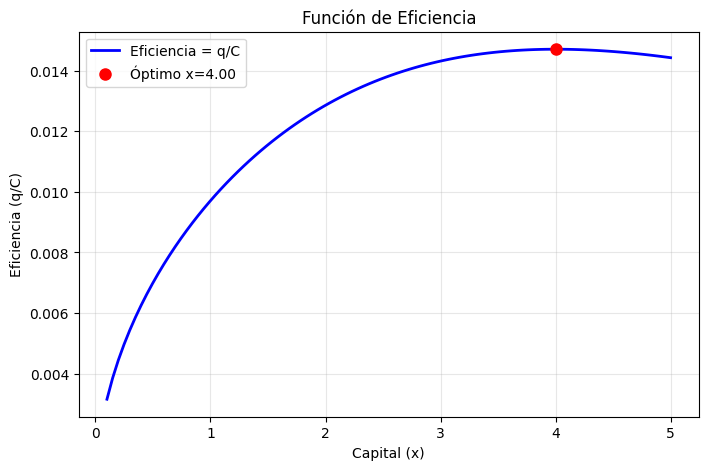

El gráfico muestra cómo la eficiencia tiene un máximo claro,
confirmando que existe un nivel óptimo de capital.


In [20]:
# Crear gráfico de la función de eficiencia
x_vals = np.linspace(0.1, 5, 100)
eficiencia_vals = []

for x_val in x_vals:
    q_val = np.sqrt(x_val)
    c_val = x_val + 2*x_val**2 + 100
    eficiencia_vals.append(q_val / c_val)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, eficiencia_vals, 'b-', linewidth=2, label='Eficiencia = q/C')

# Marcar el punto óptimo si existe
if 'x_optimo' in locals():
    x_opt_num = float(x_optimo)
    if 0.1 <= x_opt_num <= 5:
        q_opt_num = np.sqrt(x_opt_num)
        c_opt_num = x_opt_num + 2*x_opt_num**2 + 100
        ef_opt_num = q_opt_num / c_opt_num
        plt.plot(x_opt_num, ef_opt_num, 'ro', markersize=8, label=f'Óptimo x={x_opt_num:.2f}')

plt.xlabel('Capital (x)')
plt.ylabel('Eficiencia (q/C)')
plt.title('Función de Eficiencia')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("El gráfico muestra cómo la eficiencia tiene un máximo claro,")
print("confirmando que existe un nivel óptimo de capital.")